

# Draw a circle on an image wherever we double-click on it.

You will learn these functions : `cv2.setMouseCallback()`

First we create a mouse callback function which is executed when a mouse event take place. Mouse event can be anything related to mouse like left-button down, left-button up, left-button double-click etc. It gives us the coordinates (x,y) for every mouse event. With this event and location, we can do whatever we like. 

In [1]:
# To list all available events available:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

events = [i for i in dir(cv2) if 'EVENT' in i]
print(events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


## Mouse callback function

Creating mouse callback function has a specific format which is same everywhere. It differs only in what the function does. So our mouse callback function does one thing, it draws a circle where we double-click.

In [2]:
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)

## Create a black image, a window and bind the function to window

In [3]:
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

---


# More Advanced Demo, Draw a rectangular shape or circle.

In this, we draw either rectangles or circles (depending on the mode we select) by dragging the mouse like we do in Paint application. So our mouse callback function has two parts, one to draw rectangle and other to draw the circles. This specific example will be really helpful in creating and understanding some interactive applications like object tracking, image segmentation etc.


In [4]:
# Python program to extract rectangular 
# Shape using OpenCV in Python3 
import cv2 
import numpy as np 
  
drawing = False     # true if mouse is pressed 
mode = True         # if True, draw rectangle. 
ix, iy = -1, -1
  
# mouse callback function 
def draw_circle(event, x, y, flags, param): 
    global ix, iy, drawing, mode 
      
    if event == cv2.EVENT_LBUTTONDOWN: 
        drawing = True
        ix, iy = x, y 
      
    elif event == cv2.EVENT_MOUSEMOVE: 
        if drawing == True: 
            if mode == True: 
                cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), 3) 
                a = x 
                b = y 
                if a != x | b != y: 
                    cv2.rectangle(img, (ix, iy), (x, y), (0, 0, 0), -1) 
            else: 
                cv2.circle(img, (x, y), 5, (0, 0, 255), -1) 
      
    elif event == cv2.EVENT_LBUTTONUP: 
        drawing = False
        if mode == True: 
            cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), 2) 
      
        else: 
            cv2.circle(img, (x, y), 5, (0, 0, 255), -1) 

### Next we have to bind this mouse callback function to OpenCV window. 
In the main loop, we should set a keyboard binding for key ‘m’ to toggle between rectangle and circle.

In [5]:
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break

cv2.destroyAllWindows()

---

## A program which allows us to select desired portion in an image and extract that selected portion as well. 

- The task includes following things –
    - draw shape on any image
    - re-select the extract portion for in case bad selection
    - extract particular object from the image
    
    
[https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_mouse_handling/py_mouse_handling.html](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_mouse_handling/py_mouse_handling.html)

In [6]:
# Write Python code here 
# import the necessary packages 
import cv2 
  
# now let's initialize the list of reference point 
ref_point = [] 
crop = False

def shape_selection(event, x, y, flags, param): 
    # grab references to the global variables 
    global ref_point, crop 
  
    # if the left mouse button was clicked, record the starting 
    # (x, y) coordinates and indicate that cropping is being performed 
    if event == cv2.EVENT_LBUTTONDOWN: 
        ref_point = [(x, y)] 
  
    # check to see if the left mouse button was released 
    elif event == cv2.EVENT_LBUTTONUP: 
        # record the ending (x, y) coordinates and indicate that 
        # the cropping operation is finished 
        ref_point.append((x, y)) 
  
        # draw a rectangle around the region of interest 
        cv2.rectangle(image, ref_point[0], ref_point[1], (0, 255, 0), 2) 
        cv2.imshow("image", image) 
  
  
# load the image, clone it, and setup the mouse callback function 
image  = cv2.imread('image.png') 
clone = image.copy() 
cv2.namedWindow("image") 
cv2.setMouseCallback("image", shape_selection) 

  
# keep looping until the 'c' key is pressed 
while True: 
    # display the image and wait for a keypress 
    cv2.imshow("image", image) 
    key = cv2.waitKey(1) & 0xFF
  
    # press 'r' to reset the window 
    if key == ord("r"): 
        image = clone.copy() 
  
    # if the 'c' key is pressed, break from the loop 
    elif key == ord("c"): 
        break

if len(ref_point) == 2: 
    crop_img = clone[ref_point[0][1]:ref_point[1][1], ref_point[0][0]: ref_point[1][0]] 
    cv2.imshow("crop_img", crop_img) 
    cv2.waitKey(0) 
    cv2.imwrite("croped_1.png", crop_img) 


# close all open windows 
cv2.destroyAllWindows()  

# selectROI method

roi0:  1
roi1:  10
roi2:  230
roi3:  102


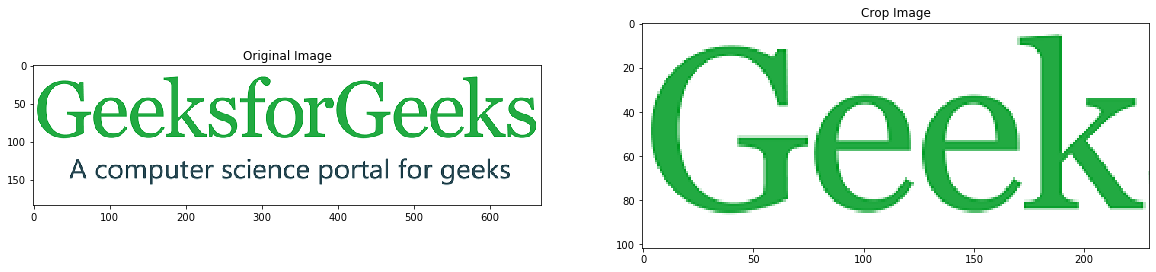

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

# Read image
img = cv2.imread('image.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_rgb_copy = np.copy(img_rgb)

# Select ROI
# roi = cv.selectROI(windowName, img, showCrosshair, fromCenter)
roi = cv2.selectROI(img_rgb_copy)

print("roi0: ",roi[0])
print("roi1: ",roi[1])
print("roi2: ",roi[2])
print("roi3: ",roi[3])


# Crop image
imCrop = img_rgb_copy[int(roi[1]):int(roi[1]+roi[3]), int(roi[0]):int(roi[0]+roi[2])]

# Displaying cropped image 
cv2.imshow("Image", imCrop) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

cv2.imwrite("croped.png", imCrop) 

# Showing the final image. 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))
ax1.set_title('Original Image')
ax1.imshow(img_rgb)
ax2.set_title('Crop Image')
ax2.imshow(imCrop)     